# Predicting Student Success Rate 

Predicting student success rate is a data science project that aims to develop a machine learning model capable of forecasting students' academic performance. The project involves using historical student data, such as demographics, previous qualifications, attendance, and curricular performance, as features to predict the target variable, which is typically a measure of academic success (e.g., final grades, graduation status, or GPA).

# Importing Libraries :

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset :

The dataset provides comprehensive information about students' enrollment in various courses and includes data related to their personal characteristics, academic performance, and economic indicators. It encompasses fields such as marital status, application mode, and age at enrollment, shedding light on the diversity of students and their preferred application methods. Additionally, the dataset delves into the students' educational backgrounds, capturing details about their previous qualifications and the qualifications of their parents, which could potentially influence their academic journey. Furthermore, the dataset contains data on the students' attendance preferences, nationality, and special needs, allowing for a more nuanced understanding of the student population. Moreover, it includes valuable information on the curricular units in the first and second semesters, covering credit details, evaluations, approvals, and grades. Importantly, the dataset also incorporates economic indicators such as the unemployment rate, inflation rate, and GDP, which may offer insights into any correlations between economic conditions and academic outcomes. Lastly, the 'Target' column provides a focal point for analysis, indicating a variable of interest that researchers or analysts may seek to predict or understand better. Overall, this dataset presents a rich opportunity for exploring the complex interplay between student characteristics, academic performance, and economic factors

In [3]:
dataframe = pd.read_csv('dataset.csv')

# Exploratory Data Analysis :

Exploratory Data Analysis (EDA) is an essential process in data analysis that involves visually and statistically exploring a dataset to gain insights into its structure and relationships. It includes examining data distributions, correlations, and dependencies among variables. EDA helps identify outliers, missing values, and trends, leading to data preprocessing decisions and informing subsequent analysis steps. The process employs various data visualization techniques and is iterative, allowing for deeper understanding and generation of new research questions. Overall, EDA provides a solid foundation for meaningful data interpretation and effective decision-making.

In [4]:
dataframe.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
dataframe.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [7]:
dataframe.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# Statical Info

Exploratory Data Analysis (EDA) involves a comprehensive examination of the dataset's statistical information to gain meaningful insights into its underlying patterns and characteristics. During this process, various key statistical measures are calculated and analyzed. Summary statistics, such as the mean, median, mode, standard deviation, minimum, maximum, and quartiles, offer an overview of the central tendencies and dispersion of numerical data. For categorical variables, count and frequency are determined to understand the distribution of each category. Correlation analysis reveals the strength and direction of linear relationships between numerical variables, while histograms and bar charts visually depict the distribution of data and frequency of categories, respectively. 

In [8]:
dataframe.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [9]:
dataframe.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [10]:
dataframe = dataframe[dataframe .Target!='Enrolled']

In [11]:
dataframe.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# Encoding :


Encoding refers to the process of converting data from one format or representation to another. In the context of data analysis and machine learning, encoding is often used to transform categorical or text data into numerical form, which can be more easily processed and utilized by algorithms.

Label Encoding: In label encoding, each unique category in a categorical variable is assigned an integer label. For example, if we have categories like "Red," "Green," and "Blue," they could be encoded as 0, 1, and 2, respectively. However, caution should be exercised when using label encoding for ordinal data, as the numerical representation may introduce an unintended ordinal relationship.

In [12]:
dataframe['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [15]:
dataframe['Target'] = encoder.fit_transform(dataframe['Target'])

In [16]:
dataframe['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

# Distribution Table of Graduate and Non Graduate 

<AxesSubplot:title={'center':'Distrbution of Target Value'}>

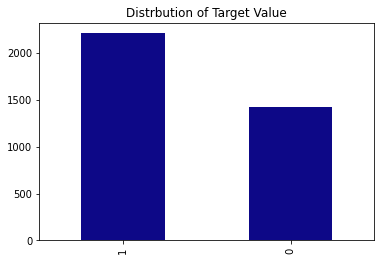

In [17]:
dataframe['Target'].value_counts().plot(kind = 'bar', 
                                        title = 'Distrbution of Target Value', 
                                        cmap = 'plasma')

# Correlation Matrix :

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [18]:
corr_matrix = dataframe.corr()

In [19]:
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.235554,-0.130370,0.003120,-0.265823,0.134920,-0.020139,0.177000,0.122920,0.070876,...,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.083865,-0.276859,0.429339,-0.009654,0.096560,0.086848,0.014639,...,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,0.075779,-0.027668,-0.014998,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.124436,0.165494,-0.204205,-0.033548,-0.055105,-0.054670,-0.036993,...,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.003120,-0.083865,0.124436,1.000000,-0.033420,-0.156097,0.002081,0.039210,0.031936,0.015836,...,-0.122366,0.184817,0.063649,0.104974,0.171483,-0.015006,-0.053998,0.038674,0.005770,0.006814
Daytime/evening attendance,-0.265823,-0.276859,0.165494,-0.033420,1.000000,-0.120619,0.032272,-0.179286,-0.133407,-0.035792,...,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.156097,-0.120619,1.000000,-0.035397,0.011777,0.022088,0.001426,...,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.086015,-0.059770,0.058446,-0.102795
Nacionality,-0.020139,-0.009654,-0.033548,0.002081,0.032272,-0.035397,1.000000,-0.029701,-0.075359,0.023369,...,0.002243,-0.028418,-0.025326,-0.017487,-0.010592,-0.012158,-0.002953,-0.010158,0.028410,-0.003823
Mother's qualification,0.177000,0.096560,-0.055105,0.039210,-0.179286,0.011777,-0.029701,1.000000,0.532757,0.309000,...,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.113616,0.055484,-0.071692,-0.048459
Father's qualification,0.122920,0.086848,-0.054670,0.031936,-0.133407,0.022088,-0.075359,0.532757,1.000000,0.222273,...,0.045833,0.028976,0.014340,0.002196,-0.007022,0.002835,-0.072628,0.061684,-0.058259,-0.003850
Mother's occupation,0.070876,0.014639,-0.036993,0.015836,-0.035792,0.001426,0.023369,0.309000,0.222273,1.000000,...,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.009914,0.030070,0.070732,0.064195


<AxesSubplot:>

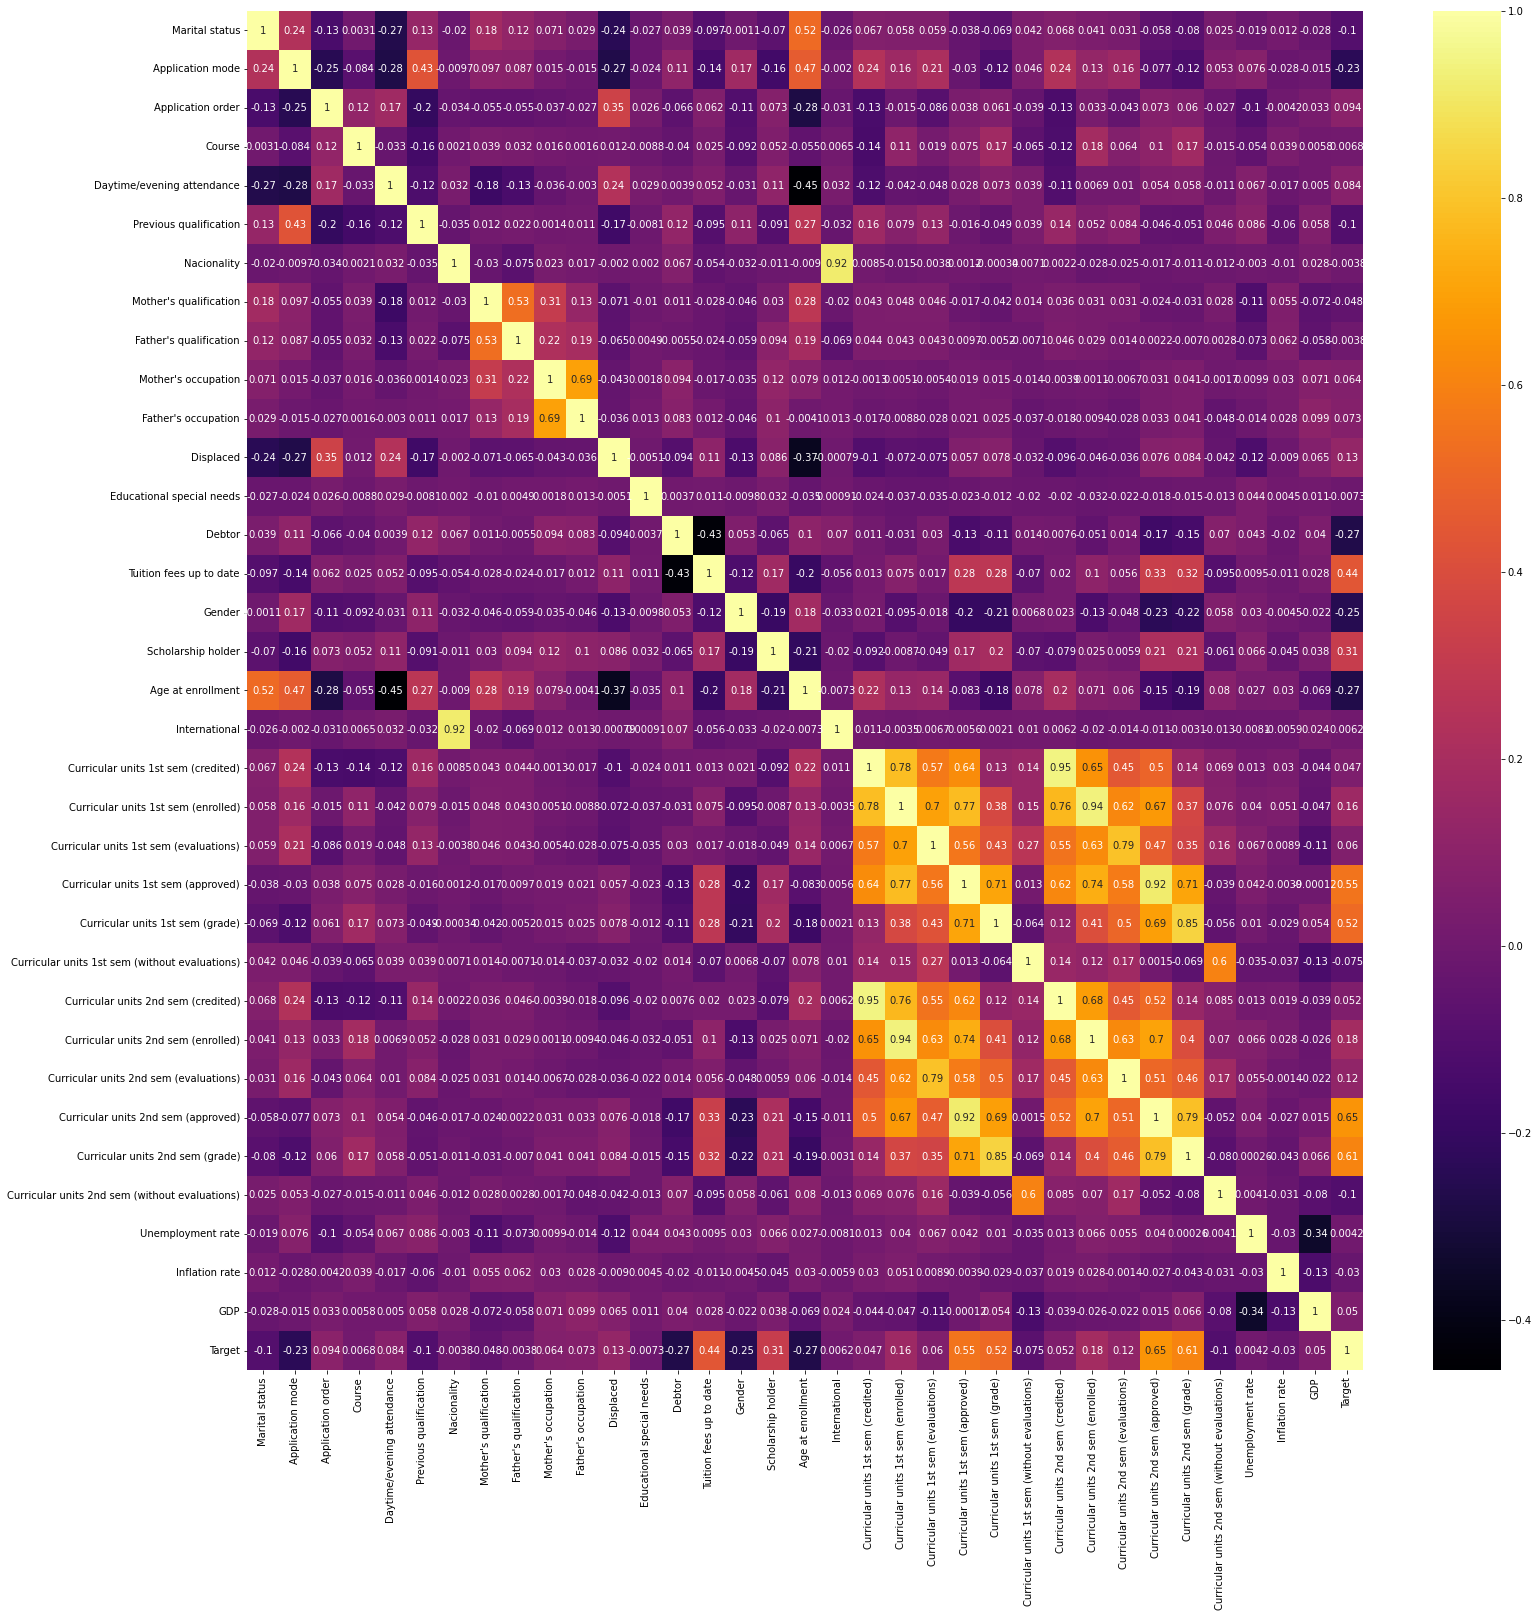

In [20]:
plt.figure(figsize = (25, 25))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

# Feature Selection :

Feature selection is an essential process in data analysis and machine learning, focused on choosing the most relevant and informative subset of features from the original dataset. The primary goal is to improve the model's performance, reduce complexity, and enhance interpretability. By eliminating irrelevant, redundant, or noisy features, feature selection helps prevent overfitting and enables the model to generalize better to new data. This, in turn, reduces computation time and memory requirements during model training and evaluation. Various techniques can be employed for feature selection, including filter methods that rank features based on statistical measures, wrapper methods that utilize the model's predictive performance, and embedded methods that incorporate feature selection within the model training process. Additionally, dimensionality reduction techniques like PCA offer an alternative approach by projecting the data onto a lower-dimensional space. Ultimately, selecting the right features is critical to producing more efficient and accurate models, facilitating data-driven insights and decision-making with enhanced clarity and efficiency.







In [21]:
dataframe.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [22]:
dataframe.drop(['International',
                'Nacionality', 
                "Father's qualification",
                'Curricular units 1st sem (credited)',
                'Curricular units 1st sem (enrolled)',
                'Curricular units 1st sem (approved)','Course',
                'Educational special needs','Unemployment rate',
                'Inflation rate'],axis=1,inplace=True)

In [23]:
dataframe.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,1,1,13,6,10,1,0,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,1,1,1,4,4,1,0,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,22,10,10,1,0,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,1,1,23,6,4,1,0,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,12,1,0,1,22,10,10,0,0,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1


In [24]:
dataframe.columns

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP', 'Target'],
      dtype='object')

In [25]:
corr_matrix = dataframe.corr()

In [26]:
corr_matrix

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
Marital status,1.000000,0.235554,-0.130370,-0.265823,0.134920,0.177000,0.070876,0.029487,-0.240544,0.039470,...,-0.069442,0.041535,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.028391,-0.100479
Application mode,0.235554,1.000000,-0.246369,-0.276859,0.429339,0.096560,0.014639,-0.014781,-0.270626,0.111712,...,-0.120509,0.045942,0.235376,0.129428,0.160493,-0.076839,-0.124287,0.052751,-0.014998,-0.233888
Application order,-0.130370,-0.246369,1.000000,0.165494,-0.204205,-0.055105,-0.036993,-0.027257,0.345791,-0.066227,...,0.060776,-0.038958,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,0.033031,0.094355
Daytime/evening attendance,-0.265823,-0.276859,0.165494,1.000000,-0.120619,-0.179286,-0.035792,-0.002980,0.243653,0.003900,...,0.073270,0.039307,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.005007,0.084496
Previous qualification,0.134920,0.429339,-0.204205,-0.120619,1.000000,0.011777,0.001426,0.010741,-0.165781,0.122667,...,-0.048686,0.039461,0.139557,0.052077,0.084018,-0.046298,-0.051467,0.045677,0.058446,-0.102795
Mother's qualification,0.177000,0.096560,-0.055105,-0.179286,0.011777,1.000000,0.309000,0.134823,-0.071407,0.011009,...,-0.041897,0.013946,0.035655,0.030811,0.030954,-0.024289,-0.031406,0.027816,-0.071692,-0.048459
Mother's occupation,0.070876,0.014639,-0.036993,-0.035792,0.001426,0.309000,1.000000,0.693807,-0.042925,0.093864,...,0.014713,-0.013753,-0.003886,0.001080,-0.006691,0.030936,0.041212,-0.001678,0.070732,0.064195
Father's occupation,0.029487,-0.014781,-0.027257,-0.002980,0.010741,0.134823,0.693807,1.000000,-0.035894,0.082943,...,0.024759,-0.037168,-0.017998,-0.009356,-0.028205,0.032742,0.041246,-0.047528,0.098918,0.073238
Displaced,-0.240544,-0.270626,0.345791,0.243653,-0.165781,-0.071407,-0.042925,-0.035894,1.000000,-0.093718,...,0.077809,-0.031757,-0.096240,-0.046431,-0.035874,0.076466,0.084463,-0.041696,0.064923,0.126113
Debtor,0.039470,0.111712,-0.066227,0.003900,0.122667,0.011009,0.093864,0.082943,-0.093718,1.000000,...,-0.110522,0.013740,0.007597,-0.050772,0.014412,-0.166305,-0.146603,0.069970,0.040475,-0.267207


<AxesSubplot:>

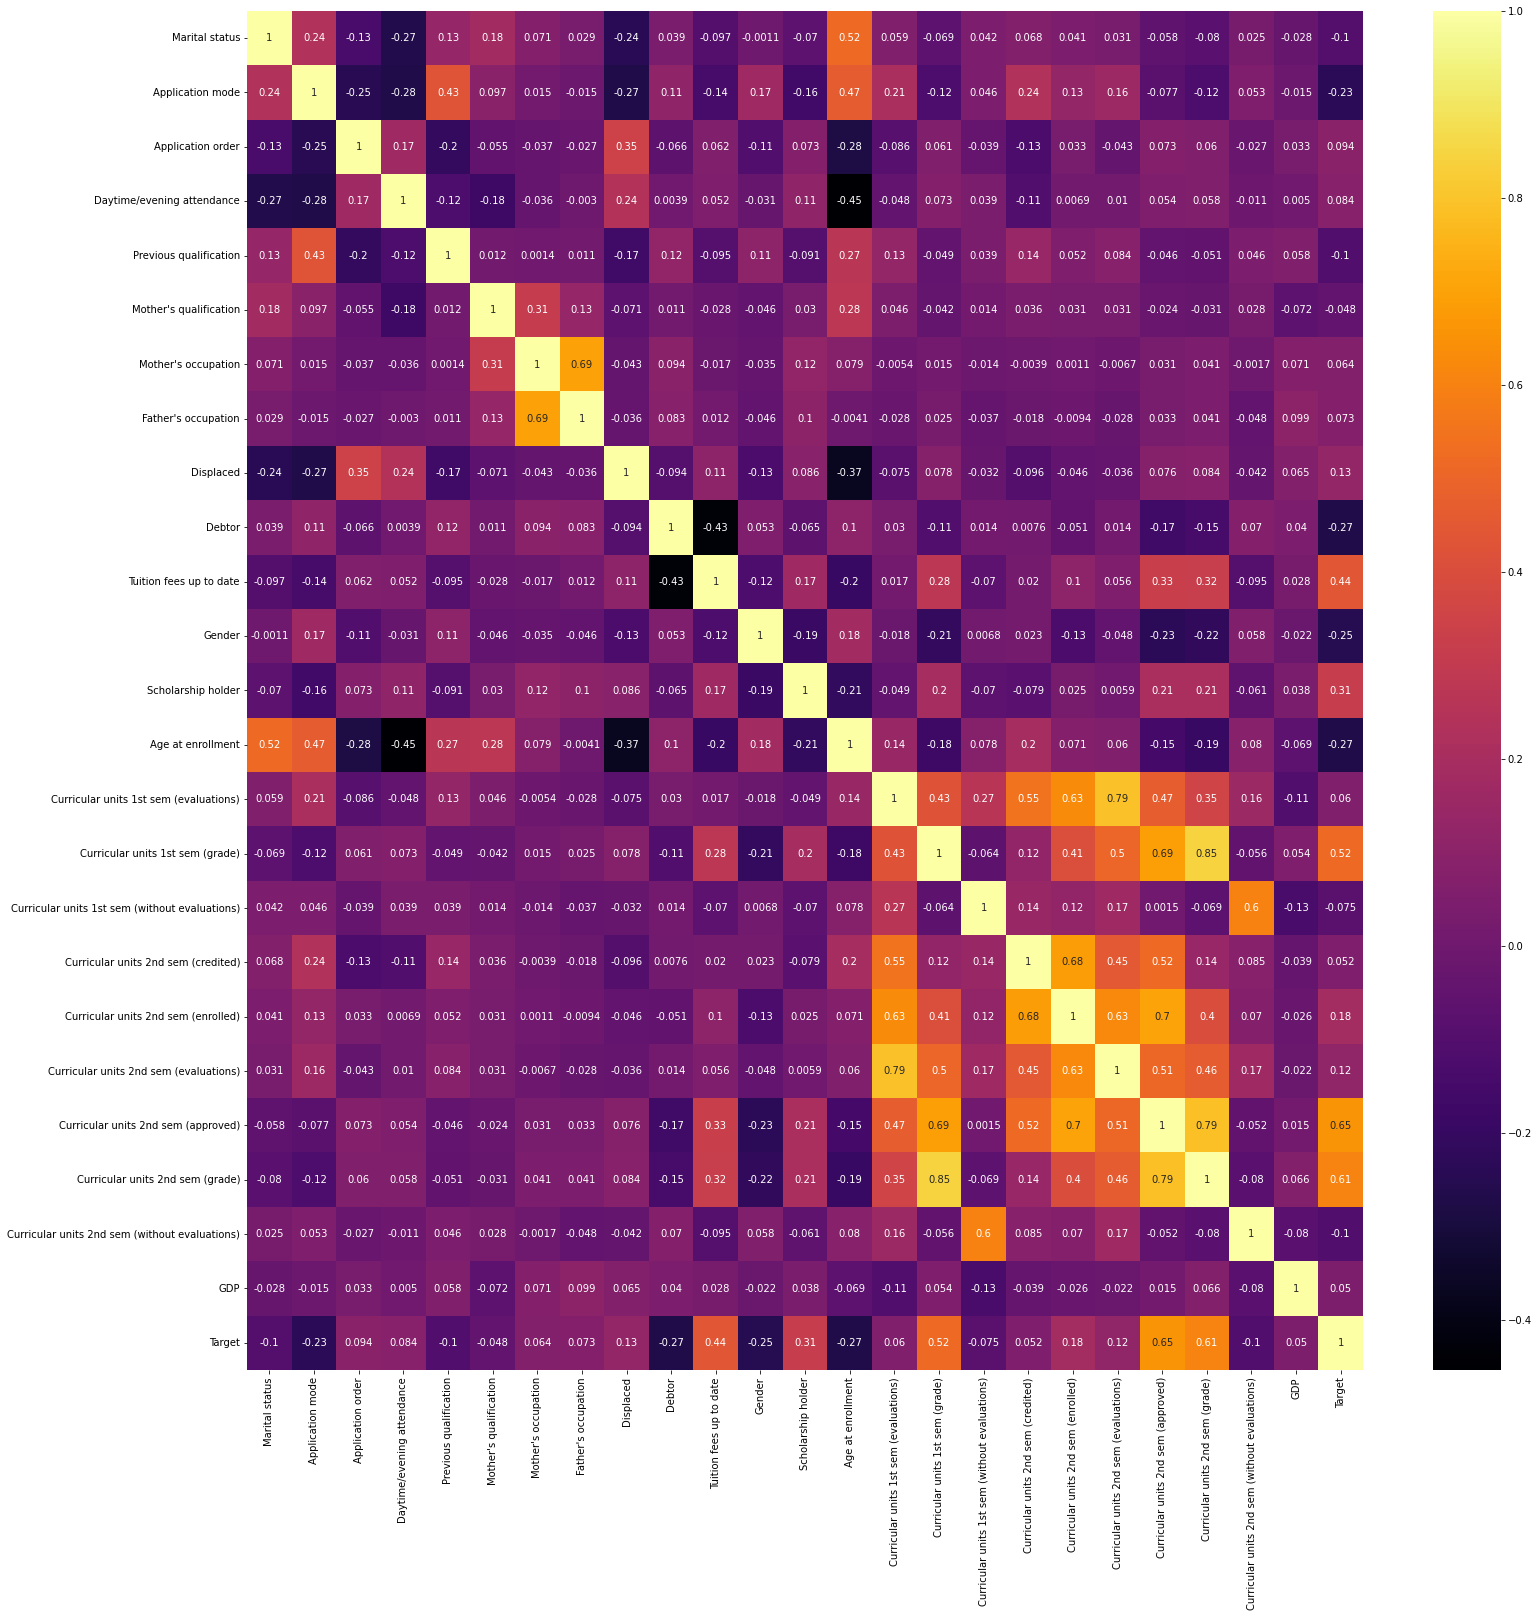

In [27]:
plt.figure(figsize = (25, 25))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'inferno')

In [28]:
dataframe.columns

Index(['Marital status', 'Application mode', 'Application order',
       'Daytime/evening attendance', 'Previous qualification',
       'Mother's qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'GDP', 'Target'],
      dtype='object')

# Correlation Of Graduation Rate :

In [29]:
dataset = dataframe.drop('Target', axis = 1)

In [30]:
dataset.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP
0,1,8,5,1,1,13,6,10,1,0,...,0,0.000000,0,0,0,0,0,0.000000,0,1.74
1,1,6,1,1,1,1,4,4,1,0,...,6,14.000000,0,0,6,6,6,13.666667,0,0.79
2,1,1,5,1,1,22,10,10,1,0,...,0,0.000000,0,0,6,0,0,0.000000,0,1.74
3,1,8,2,1,1,23,6,4,1,0,...,8,13.428571,0,0,6,10,5,12.400000,0,-3.12
4,2,12,1,0,1,22,10,10,0,0,...,9,12.333333,0,0,6,6,6,13.000000,0,0.79


<AxesSubplot:title={'center':'Correlation With Dropout'}>

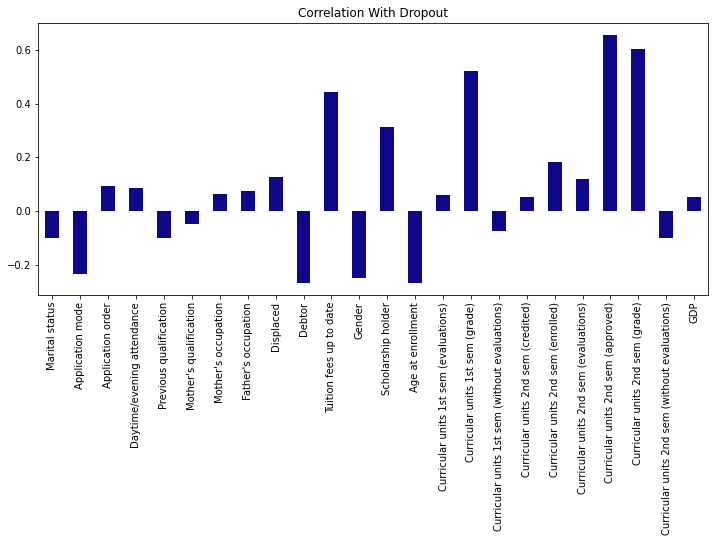

In [31]:
dataset.corrwith(dataframe['Target']).plot.bar(
    title = 'Correlation With Dropout', 
    figsize = (12, 5) , 
    cmap = 'plasma'
)

In [32]:
dataframe.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Mother's qualification,Mother's occupation,Father's occupation,Displaced,Debtor,...,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),GDP,Target
0,1,8,5,1,1,13,6,10,1,0,...,0.000000,0,0,0,0,0,0.000000,0,1.74,0
1,1,6,1,1,1,1,4,4,1,0,...,14.000000,0,0,6,6,6,13.666667,0,0.79,1
2,1,1,5,1,1,22,10,10,1,0,...,0.000000,0,0,6,0,0,0.000000,0,1.74,0
3,1,8,2,1,1,23,6,4,1,0,...,13.428571,0,0,6,10,5,12.400000,0,-3.12,1
4,2,12,1,0,1,22,10,10,0,0,...,12.333333,0,0,6,6,6,13.000000,0,0.79,1


# Splitting Dataset :

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [33]:
x = dataframe.drop('Target', axis = 1)
y = dataframe['Target']

In [34]:
x.shape, y.shape

((3630, 24), (3630,))

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,  
                                                    y, 
                                                    test_size = 0.3, 
                                                    stratify = y, 
                                                    random_state = 42)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2541, 24), (1089, 24), (2541,), (1089,))

# Scaling :

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
x_train

array([[-0.3002885 , -1.09973036, -0.56574082, ...,  0.54376269,
        -0.18874023,  0.79649683],
       [-0.3002885 ,  0.0459129 ,  0.18220269, ...,  0.39318043,
        -0.18874023,  0.77418582],
       [-0.3002885 ,  0.0459129 ,  0.18220269, ...,  0.39318043,
        -0.18874023, -1.39444413],
       ...,
       [-0.3002885 , -0.52690873, -0.56574082, ..., -1.80532043,
        -0.18874023,  0.35027667],
       [-0.3002885 , -1.09973036, -0.56574082, ...,  0.64917026,
        -0.18874023,  1.56399549],
       [ 1.37670726,  1.00061561, -0.56574082, ..., -1.80532043,
        -0.18874023, -0.41275979]])

In [42]:
x_test

array([[-0.3002885 , -1.09973036,  0.18220269, ...,  0.31272649,
        -0.18874023, -0.76081151],
       [-0.3002885 ,  0.23685344, -0.56574082, ...,  0.18236528,
        -0.18874023,  0.35027667],
       [-0.3002885 ,  1.57343724, -0.56574082, ...,  0.15655118,
        -0.18874023, -1.81389107],
       ...,
       [-0.3002885 , -1.09973036,  0.18220269, ...,  0.430826  ,
        -0.18874023,  0.35027667],
       [-0.3002885 ,  0.23685344, -0.56574082, ...,  0.18236528,
        -0.18874023,  0.1405532 ],
       [-0.3002885 ,  0.23685344,  0.18220269, ...,  0.42329688,
        -0.18874023,  0.35027667]])

# Model Selection And Training :

Model Selection:

Model selection involves choosing the best algorithm or model architecture for the given problem and dataset. This step requires careful consideration of various factors, such as the nature of the data (e.g., numerical or categorical), the problem type (e.g., regression, classification, clustering), the amount of available data, and the desired model performance. It is essential to select a model that can effectively capture the underlying patterns in the data and make accurate predictions.

Model Training:

Once the appropriate model has been selected, the next step is to train it on the dataset. Model training involves adjusting the model's parameters using the training data to make accurate predictions on unseen data. The goal is to minimize the difference between the model's predictions and the actual target values during training.

In [43]:
x_train.shape, x_test.shape

((2541, 24), (1089, 24))

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
clf = RandomForestClassifier()

In [46]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
y_pred = clf.predict(x_test)

In [48]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [49]:
clf.score(x_test, y_test)

0.9090909090909091

# Hyper-parameter Tuning :

Hyperparameter tuning is a critical process in machine learning that involves finding the optimal set of hyperparameters for a given model. Hyperparameters are configuration settings that are not learned from the data during model training but are set before the training process begins. They significantly impact the model's performance and generalization ability.

The goal of hyperparameter tuning is to systematically search through different combinations of hyperparameters to identify the configuration that yields the best model performance. The process ensures that the model is well-optimized and capable of making accurate predictions on new, unseen data.

Grid Search: 

Grid search involves specifying a list of values for each hyperparameter. The algorithm then exhaustively tries all possible combinations of hyperparameters to find the best one. This method is simple and can be effective for a small number of hyperparameters, but it becomes computationally expensive as the number of hyperparameters increases.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None , 10, 20],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],
}

In [52]:
clf_grid=GridSearchCV(estimator=clf, 
                     param_grid=param_grid,
                     cv=3,
                     verbose=0,
                     n_jobs=-1,
                     return_train_score=False)

In [53]:
clf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100]})

In [54]:
clf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 100}

In [55]:
random_forest = RandomForestClassifier(**clf_grid.best_params_)

In [56]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4)

In [57]:
y_pred = random_forest.predict(x_test)

In [58]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [59]:
print(y_test.iloc[20]), print(y_pred[20])

1
1


(None, None)

In [60]:
print(y_test.iloc[30]), print(y_pred[30])

0
0


(None, None)

# Error Analysis :

Error analysis is a crucial process in machine learning and data analysis, aiming to understand model errors and patterns of misclassifications. By investigating causes and impacts of errors, analysts can devise strategies to improve the model's performance, leading to more accurate and reliable predictions. This iterative process enables continuous refinement, making machine learning systems more effective in real-world applications.

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [62]:
accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy_score: ', accuracy_score)

Accuracy_score:  0.9100091827364555


In [63]:
precision_score = precision_score(y_test, y_pred)
print('Precision_score: ', precision_score)

Precision_score:  0.8995756718528995


In [64]:
f1_score = f1_score(y_test, y_pred)
print('f1_score: ', f1_score)

f1_score:  0.9284671532846714


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       426
           1       0.90      0.96      0.93       663

    accuracy                           0.91      1089
   macro avg       0.91      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089



In [66]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [67]:
confusion_matrix

array([[355,  71],
       [ 27, 636]], dtype=int64)

<AxesSubplot:>

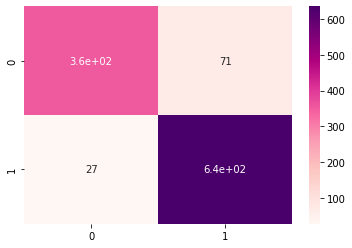

In [68]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')

# Thanks !